# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [7]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)




In [8]:
#Provide# Print dataset dimensions and size
print("Dataset dimensions:", X.shape)
print("Dataset size:", X.size)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Print number of unique classes
print("\nNumber of classes:", len(np.unique(y))) 


Dataset dimensions: (70000, 784)
Dataset size: 54880000
Number of samples: 70000
Number of features: 784

Number of classes: 10


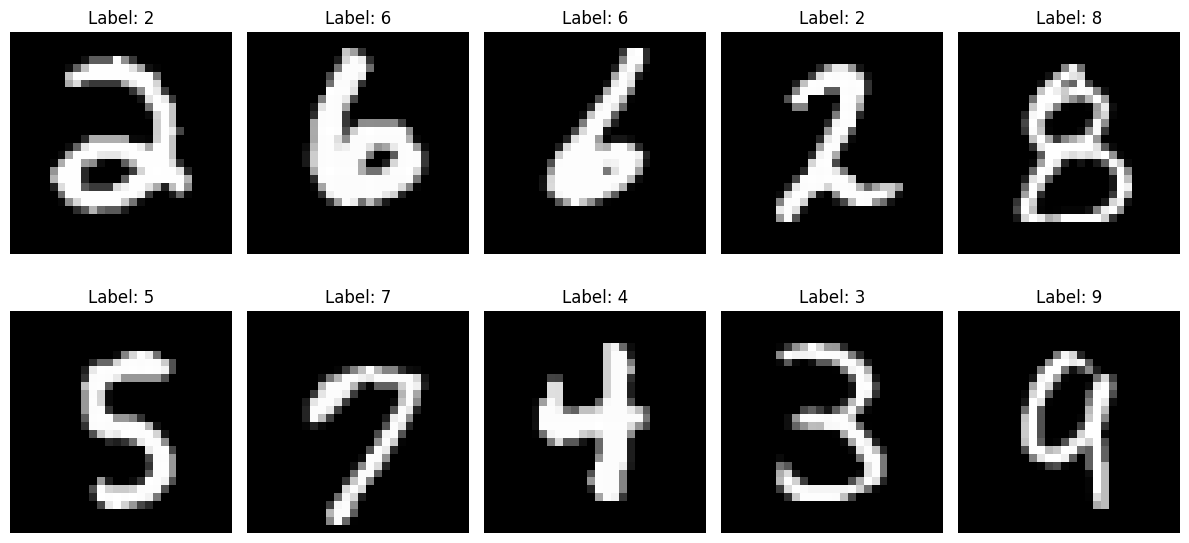

In [9]:
# Visualize sample digits from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
sample_indices = np.random.randint(0, X.shape[0], 10)

for i, ax in enumerate(axes.flat):
    # Reshape the flattened image back to 28x28
    img = X[sample_indices[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {y[sample_indices[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [10]:
# Scale pixel values to [0,1]
X = X / 255.0

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes of resulting sets
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (56000, 784)
Test set shape: (14000, 784)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [11]:
# Train Logistic Regression model with default parameters
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
lr_predictions = lr_model.predict(X_test_scaled)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")

Logistic Regression Test Accuracy: 0.9150


/opt/anaconda3/envs/bme3053c/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Create and train Neural Network model
from sklearn.neural_network import MLPClassifier

# Create neural network with 2 hidden layers (100, 50 neurons)
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    random_state=42,
    max_iter=1000
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on test set
nn_predictions = nn_model.predict(X_test_scaled)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Test Accuracy: {nn_accuracy:.4f}")


Neural Network Test Accuracy: 0.9718


### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


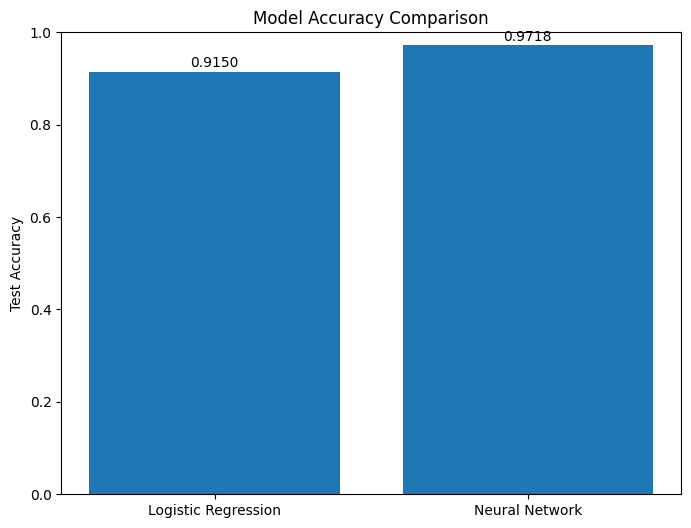

In [13]:
# Provide your code for part 4-1 here
# Create bar plot comparing model accuracies
import matplotlib.pyplot as plt

# Create data for plotting
models = ['Logistic Regression', 'Neural Network']
accuracies = [lr_accuracy, nn_accuracy]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since accuracy is between 0 and 1
plt.title('Model Accuracy Comparison')
plt.ylabel('Test Accuracy')

# Add value labels on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.show()


Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.88      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.87      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.86      0.87      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000


Confusion Matrix:
[[1285    1   10    0    1   13   21    4    6    2]
 [   0 1552    6    9    3    7    0    4   16    3]
 [   6   18 1234   20   12   13   22   16   29   10]
 [   5   1

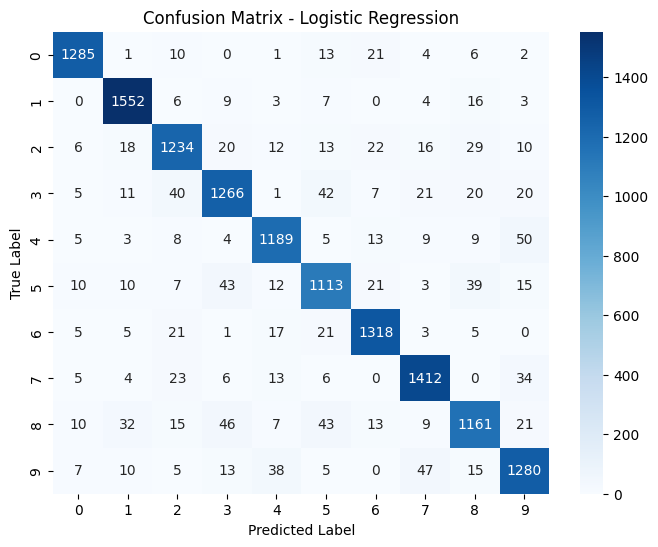


Neural Network Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.96      0.97      0.96      1380
           3       0.98      0.96      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix:
[[1317    0    3    0    1    0   11    4    6    1]
 [   0 1582    4    0    2    0    1    7    4    0]
 [   0    6 1337    4    5    0    4    7   11    6]
 [   1    1   

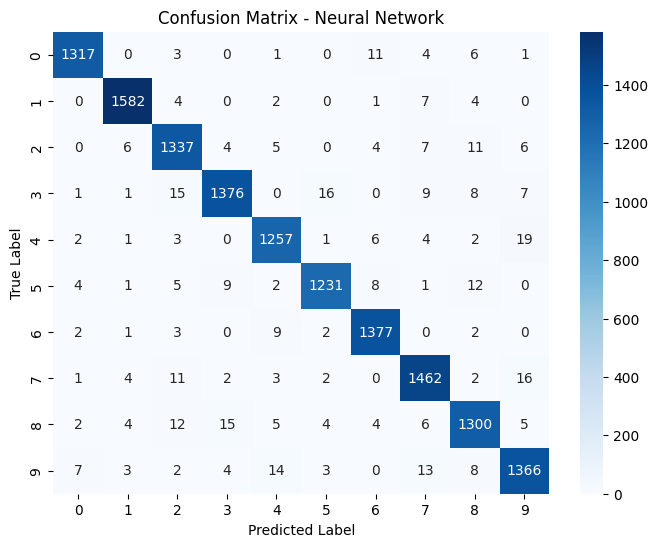

In [14]:
# Provide your code for part 4-2 here
# Print classification reports and confusion matrices
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Logistic Regression Results:")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

# Visualize confusion matrix for logistic regression
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nNeural Network Results:")
print("\nClassification Report:")
print(classification_report(y_test, nn_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nn_predictions))

# Visualize confusion matrix for neural network
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


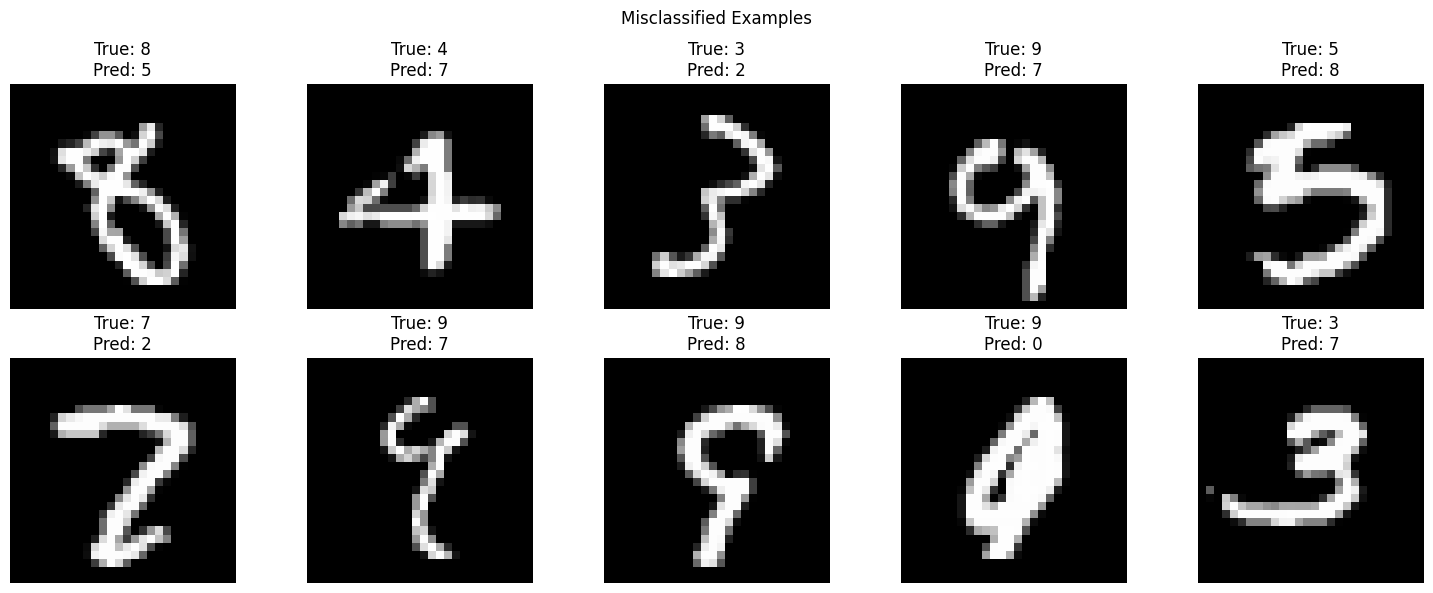

In [18]:

# Find indices of misclassified examples
lr_misclassified = np.where(lr_predictions != y_test)[0]
nn_misclassified = np.where(nn_predictions != y_test)[0]

# Create figure with subplots for both models
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
plt.suptitle('Misclassified Examples')

# Plot misclassified examples for Logistic Regression
for i, idx in enumerate(lr_misclassified[:5]):  # Show up to 5 examples
    axes[0,i].imshow(X_test[idx].reshape(28,28), cmap='gray')
    axes[0,i].axis('off')
    axes[0,i].set_title(f'True: {y_test[idx]}\nPred: {lr_predictions[idx]}')
axes[0,0].set_ylabel('Logistic\nRegression', rotation=0, labelpad=40)

# Plot misclassified examples for Neural Network
for i, idx in enumerate(nn_misclassified[:5]):  # Show up to 5 examples
    axes[1,i].imshow(X_test[idx].reshape(28,28), cmap='gray')
    axes[1,i].axis('off')
    axes[1,i].set_title(f'True: {y_test[idx]}\nPred: {nn_predictions[idx]}')
axes[1,0].set_ylabel('Neural\nNetwork', rotation=0, labelpad=40)

plt.tight_layout()
plt.show()
